In [1]:
from HDF.HDFData import HDFArray
import matplotlib.pyplot as plt
import peakdetect as pkd
import os.path
import math
import pandas as pd
from Analyzer import *
import pandas_profiling
path = './FilteredData/'

In [2]:
file = HDFArray(path + '1.h5')
eeg = file.getChannelTable('EEG')[1]
ecg = file.getChannelTable('ECG')[1]
pnvm = file.getChannelTable('PNVM')[1]
fd = file.getChannelTable('FD')[1]
track = file.getChannelTable('TRACK_MARKERS')[1]

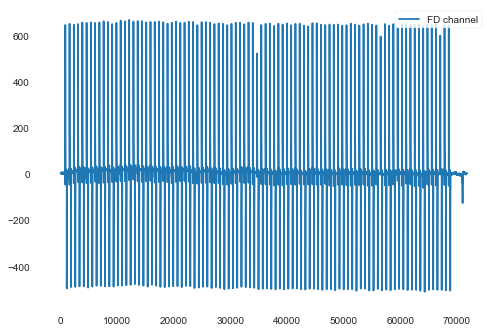

In [3]:
# Рассмотрим канал FD
plt.plot(fd, label='FD channel')
plt.legend()

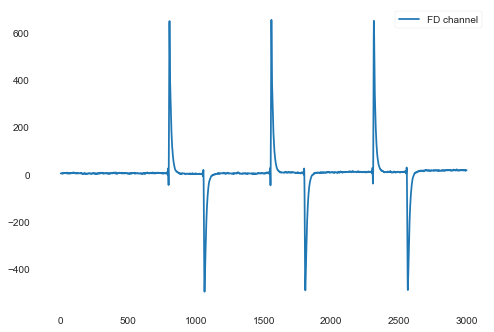

In [4]:
# Визуализируем данные на маленьком интервале
plt.plot(fd[0:3000], label='FD channel')
plt.legend()
# Наблюдаем пики локальных максимумов и минимумов
# Такие всплески сигнала соответствуют включению синхростимула
# Можно взять интервалы от одного всплеска до другого, то есть от одного появления объекта на экране
# до следующего появления объекта.

In [5]:
count_synchrostimuls = 0
for signal in track:
    if signal[1] == 16000:
        count_synchrostimuls+=1
print('Количество включений синхростимула = ', count_synchrostimuls)

Количество включений синхростимула =  92


In [6]:
_max, _min = pkd.peakdetect(fd, None, 50, 50)
xm = [p[0] for p in _max]
ym = [p[1] for p in _max]

In [7]:
print('Количество всплесков на канале FD = ', len(ym))
# Видим, что количество подсчитанных синхростимулов и всплесков на сигнале совпадает
# Однако стоит отметить, что на других файлах есть разница в 1-2 единицы
# Также есть файлы с существенной разницей
# Последние не будем учитывать ввиду их загрязнености, а небольшую разницу будет убирать путем
# Обрезания сигнала
# Таким образом мы пришли к тому, как синхронизировать наши данные

Количество всплесков на канале FD =  92


In [8]:
# Рассмотрим канал EEG
data = eeg.tolist()
labels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5',
             'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz', 'O2']
df = pd.DataFrame(data, columns=labels)


In [9]:
df.describe()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,T3,C3,...,C4,T4,T5,P3,Pz,P4,T6,O1,Oz,O2
count,71700.000000,71700.00000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,...,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000
mean,41.600030,25.37840,17.780211,-15.173605,-32.884310,16.124653,8.368623,14.024852,-8.098867,47.016403,...,14.384367,20.381053,17.852127,-23.186937,38.372109,-1.165675,36.866245,146.715132,46.105898,40.664498
std,28.625105,24.99265,29.664317,26.670100,28.309118,28.543359,40.056531,27.201845,27.268190,27.337427,...,28.105889,65.089518,25.565429,32.045967,32.332369,26.035953,113.060352,27.273272,53.447482,26.850706
min,-994.875000,-859.00000,-851.375000,-990.125000,-1073.875000,-1098.750000,-969.000000,-651.375000,-1017.375000,-984.875000,...,-1195.125000,-4016.375000,-1018.250000,-1113.750000,-1222.375000,-884.750000,-3975.500000,-777.500000,-967.750000,-1028.375000
25%,28.375000,11.68750,1.187500,-30.562500,-50.750000,-0.625000,-15.687500,-4.437500,-23.812500,29.625000,...,-1.812500,5.937500,0.250000,-38.312500,20.750000,-16.312500,18.125000,131.437500,21.500000,24.812500
50%,40.687500,25.50000,20.437500,-17.187500,-32.875000,17.000000,5.187500,14.312500,-10.812500,44.187500,...,14.687500,21.875000,17.687500,-21.250000,38.875000,-1.062500,34.750000,146.125000,37.875000,38.000000
75%,53.125000,39.00000,34.562500,-3.562500,-15.437500,33.812500,29.250000,31.000000,2.937500,63.312500,...,29.187500,34.187500,34.562500,-4.750000,57.250000,13.937500,51.375000,161.000000,54.562500,53.500000
max,227.000000,192.50000,170.750000,132.687500,100.687500,165.562500,205.375000,152.375000,170.187500,184.437500,...,159.562500,2173.812500,138.062500,99.375000,183.687500,118.687500,3111.187500,298.437500,444.312500,205.312500


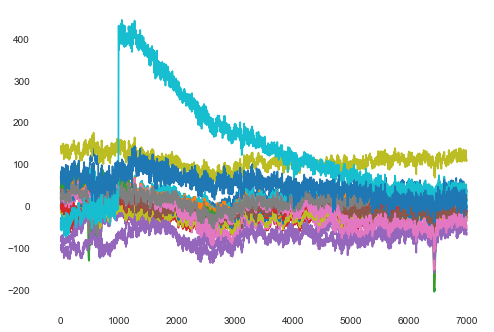

In [10]:
plt.plot(eeg[0:7000])
# Можем видеть непонятные всплески сигнала на графике(выбросы?)

In [11]:
# Организуем датафрейм из данных со всех сигналов
fieldnames = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5',
             'P3', 'Pz', 'P4', 'T6', 'O1', 'Oz', 'O2', 'ecg', 'pnvm', 'fd']
data = np.hstack((eeg, np.atleast_2d(ecg)))
data = np.hstack((data, np.atleast_2d(pnvm)))
data = np.hstack((data, np.atleast_2d(fd)))
data = data.tolist()
df = pd.DataFrame(data, columns=fieldnames)

In [12]:
df.describe()

,Fp1,Fpz,Fp2,F7,F3,Fz,F4,F8,T3,C3,...,P3,Pz,P4,T6,O1,Oz,O2,ecg,pnvm,fd
count,71700.000000,71700.00000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,...,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000,71700.000000
mean,41.600030,25.37840,17.780211,-15.173605,-32.884310,16.124653,8.368623,14.024852,-8.098867,47.016403,...,-23.186937,38.372109,-1.165675,36.866245,146.715132,46.105898,40.664498,412.489317,-0.500530,7.424644
std,28.625105,24.99265,29.664317,26.670100,28.309118,28.543359,40.056531,27.201845,27.268190,27.337427,...,32.045967,32.332369,26.035953,113.060352,27.273272,53.447482,26.850706,1440.772994,17.812473,88.228401
min,-994.875000,-859.00000,-851.375000,-990.125000,-1073.875000,-1098.750000,-969.000000,-651.375000,-1017.375000,-984.875000,...,-1113.750000,-1222.375000,-884.750000,-3975.500000,-777.500000,-967.750000,-1028.375000,-5388.000000,-70.000000,-511.000000
25%,28.375000,11.68750,1.187500,-30.562500,-50.750000,-0.625000,-15.687500,-4.437500,-23.812500,29.625000,...,-38.312500,20.750000,-16.312500,18.125000,131.437500,21.500000,24.812500,-396.000000,-12.000000,2.000000
50%,40.687500,25.50000,20.437500,-17.187500,-32.875000,17.000000,5.187500,14.312500,-10.812500,44.187500,...,-21.250000,38.875000,-1.062500,34.750000,146.125000,37.875000,38.000000,92.500000,-3.000000,6.000000
75%,53.125000,39.00000,34.562500,-3.562500,-15.437500,33.812500,29.250000,31.000000,2.937500,63.312500,...,-4.750000,57.250000,13.937500,51.375000,161.000000,54.562500,53.500000,1165.000000,11.000000,14.000000
max,227.000000,192.50000,170.750000,132.687500,100.687500,165.562500,205.375000,152.375000,170.187500,184.437500,...,99.375000,183.687500,118.687500,3111.187500,298.437500,444.312500,205.312500,8250.000000,110.000000,669.000000


In [13]:
y = track[:,3]
x = track[:,2]

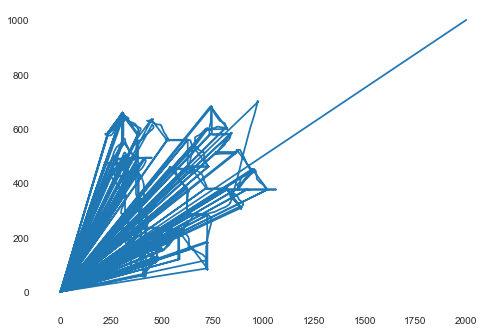

In [14]:
plt.plot(x,y) # Движения курсора мыши в течение всего эксперимента

In [15]:
import pandas as pd
series_speed_reaction = []
series_time_reaction = []
file = FileAnalyzer(path + '39.h5')
intervals = file.get_intervals()
data = []
for interval in intervals:
    characteristics = interval.get_characteristics()
    data.append(characteristics[0:2])
    series_speed_reaction.append(characteristics[0])
    series_time_reaction.append(characteristics[1])
series_speed_reaction = np.array(series_speed_reaction)
series_time_reaction = np.array(series_time_reaction)
count_intervals = len(series_speed_reaction)
print('Count time intervals = ', count_intervals)
dataset = pd.DataFrame(data, columns=['time_reaction', 'speed_reaction'])
print(dataset.head())

Count time intervals =  284
   time_reaction  speed_reaction
0       0.013096           683.0
1       0.019158           380.0
2       0.030406           281.0
3       0.039032           232.0
4       0.034018           237.0


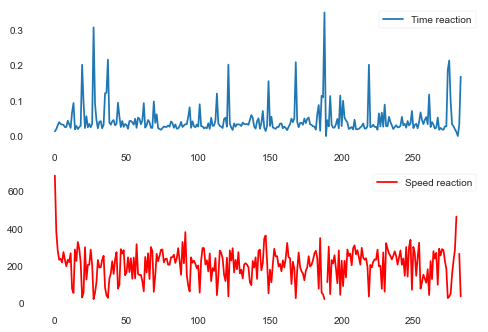

In [16]:
plt.figure(1)
plt.subplot(211)
plt.plot(series_speed_reaction, label='Time reaction')
plt.legend()
plt.subplot(212)
plt.plot(series_time_reaction, color='red', label='Speed reaction')
plt.legend()

In [17]:
# Реализуем фукнкцию скользящей средней для кратковременного прогноза
def moving_average(series, n):
    return np.average(series[-n:])
moving_average(dataset['time_reaction'], count_intervals)

0.044137848817137025

In [18]:
print(dataset['speed_reaction'])

0      683.0
1      380.0
2      281.0
3      232.0
4      237.0
       ...  
279    286.0
280    463.0
281      NaN
282    264.0
283     36.0
Name: speed_reaction, Length: 284, dtype: float64


In [19]:
def plotMovingAverage(series, n):
    rolling_mean = []
    for i in range(n):
        rolling_mean.append(moving_average(series, i))
    plt.figure(figsize=(15,5))
    plt.title("Moving average")
    plt.plot(rolling_mean, label="Rolling mean trend")
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

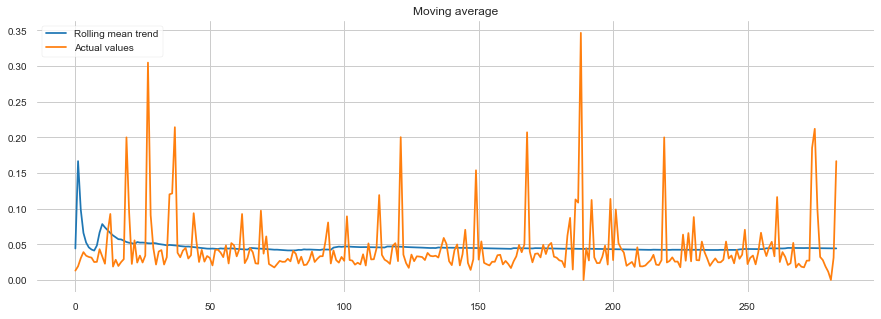

In [20]:
plotMovingAverage(dataset['time_reaction'], count_intervals)

In [21]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

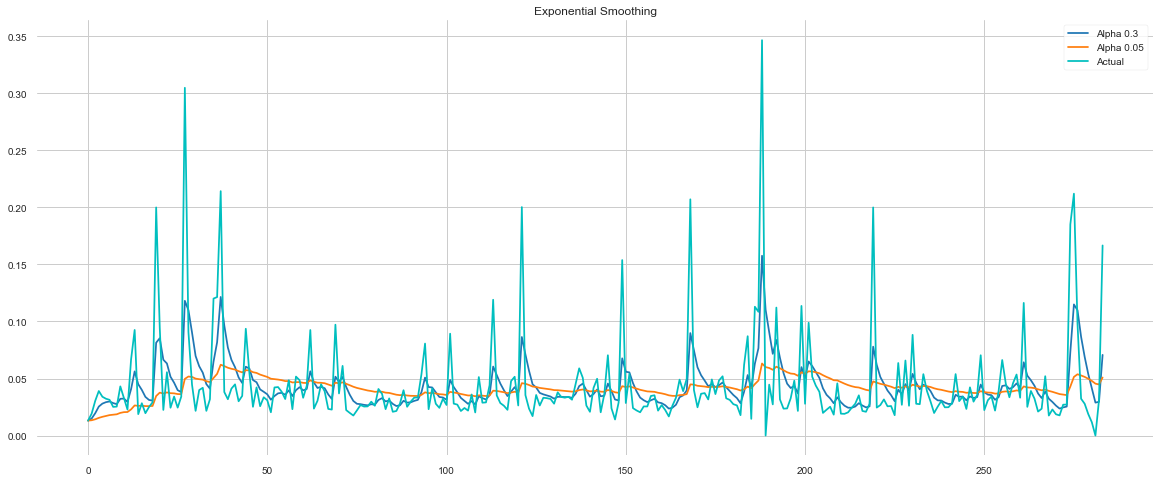

In [22]:
plt.figure(figsize=(20, 8))
for alpha in [0.3, 0.05]:
    plt.plot(exponential_smoothing(dataset['time_reaction'], alpha), label="Alpha {}".format(alpha))
plt.plot(dataset['time_reaction'], "c", label = "Actual")
plt.legend(loc="best")
plt.axis('tight')
plt.title("Exponential Smoothing")
plt.grid(True)

In [23]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

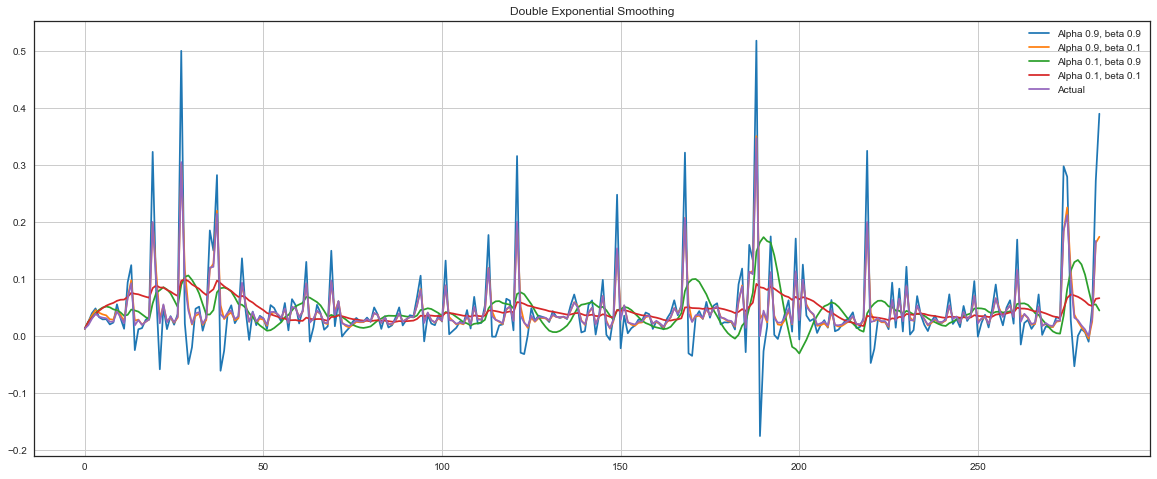

In [24]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.1]:
        for beta in [0.9, 0.1]:
            plt.plot(double_exponential_smoothing(dataset['time_reaction'], alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(dataset['time_reaction'], label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

In [25]:
size_train = int(count_intervals * 0.8)
size_test = count_intervals - size_train
print('Интервалов для обучения: ', size_train)
print('Интервалов для тестирования: ', size_test)

Интервалов для обучения:  227
Интервалов для тестирования:  57


In [26]:
data_train = series_speed_reaction[:size_train]
data_test = series_speed_reaction[size_train:]

In [27]:
print(len(data_train))
print(len(data_test))

227
57


In [28]:
dataset.describe()

,time_reaction,speed_reaction
count,284.000000,282.000000
mean,0.044138,204.464539
std,0.042185,85.880082
min,0.000000,21.000000
25%,0.024692,151.000000
50%,0.031663,220.000000
75%,0.044242,263.250000
max,0.346672,683.000000


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
'''port random
random.seed()
def prepareData(data, lag_start=40, lag_end = 60, test_size=0.20):
    ndata = pd.DataFrame(data.copy())
    ndata.columns = ["y"]
    test_index = int(len(data)*(1-test_size))
    print(ndata)
    for i in range(test_index):
        sign = 1
        if (random.randint(0,1) == 1):
            sign = -1
        ndata["y"][i]+= (sign * (lag_end - lag_start*random.random()))
    print(ndata)
    ndata = ndata.dropna()
    ndata = ndata.reset_index(drop=True)
    x_train = ndata.loc[:test_index]
    y_train = ndata.loc[:test_index]["y"]
    x_test = ndata.loc[test_index:]
    y_test = ndata.loc[test_index:]["y"]
    return x_train, x_test, y_train, y_test
'''

'port random\nrandom.seed()\ndef prepareData(data, lag_start=40, lag_end = 60, test_size=0.20):\n    ndata = pd.DataFrame(data.copy())\n    ndata.columns = ["y"]\n    test_index = int(len(data)*(1-test_size))\n    print(ndata)\n    for i in range(test_index):\n        sign = 1\n        if (random.randint(0,1) == 1):\n            sign = -1\n        ndata["y"][i]+= (sign * (lag_end - lag_start*random.random()))\n    print(ndata)\n    ndata = ndata.dropna()\n    ndata = ndata.reset_index(drop=True)\n    x_train = ndata.loc[:test_index]\n    y_train = ndata.loc[:test_index]["y"]\n    x_test = ndata.loc[test_index:]\n    y_test = ndata.loc[test_index:]["y"]\n    return x_train, x_test, y_train, y_test\n'

In [31]:
df = pd.DataFrame(dataset['time_reaction'], columns=["time_reaction"])
print(df)
#x_train, x_test, y_train, y_test = prepareData(df)
#print('x=', x_train.shape, ' y =', y_train.shape)

     time_reaction
0         0.013096
1         0.019158
2         0.030406
3         0.039032
4         0.034018
..             ...
279       0.018829
280       0.011631
281       0.000000
282       0.031236
283       0.166667

[284 rows x 1 columns]


In [32]:
'''
x_y_test = []
for i in range(len(y_test)):
    x_y_test.append(i)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
print(prediction, y_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users")
plt.grid(True);'''

'\nx_y_test = []\nfor i in range(len(y_test)):\n    x_y_test.append(i)\nfrom sklearn.linear_model import LinearRegression\nlr = LinearRegression()\nlr.fit(x_train, y_train)\nprediction = lr.predict(x_test)\nprint(prediction, y_test)\nplt.figure(figsize=(15, 7))\nplt.plot(prediction, "r", label="prediction")\nplt.plot(y_test, label="actual")\nplt.legend(loc="best")\nplt.title("Linear regression\n Mean absolute error {} users")\nplt.grid(True);'

In [33]:
import random
random.seed()
def prepareData(data, lag_start=1, lag_end = 5, test_size=0.50):
    data = pd.DataFrame(data.copy())
    data.columns = ["y"]
    test_index = int(len(data)*(1-test_size))
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    data = data.dropna()
    data = data.reset_index(drop=True)
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]
    return X_train, X_test, y_train, y_test


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train, X_test, y_train, y_test = prepareData(df, lag_start=2, lag_end=10, test_size=0.20)
print(X_test.shape, y_test.shape)

(48, 8) (48,)


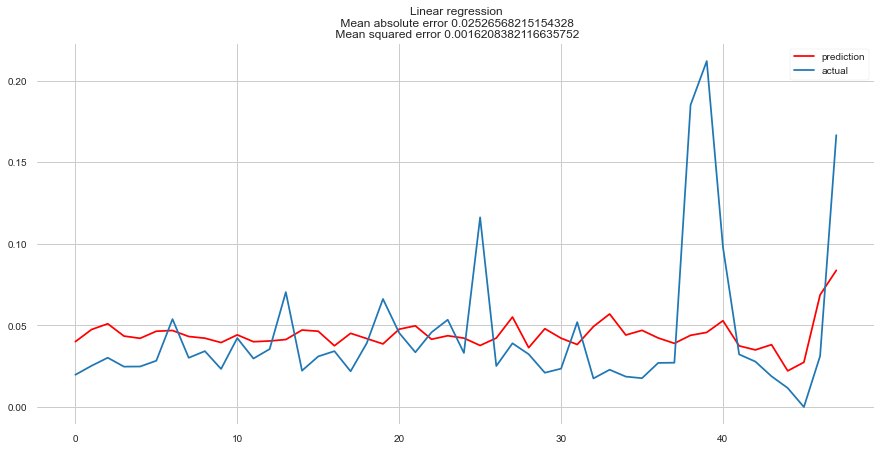

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {}\n Mean squared error {}".format(mean_absolute_error(prediction, y_test),mean_squared_error(prediction, y_test)))
plt.grid(True);

In [36]:
def performTimeSeriesCV(X_train, y_train, number_folds, model, metrics):
    print('Size train set: {}'.format(X_train.shape))

    k = int(np.floor(float(X_train.shape[0]) / number_folds))
    print('Size of each fold: {}'.format(k))

    errors = np.zeros(number_folds-1)

    # loop from the first 2 folds to the total number of folds    
    for i in range(2, number_folds + 1):
        print('')
        split = float(i-1)/i
        print('Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i) )

        X = X_train[:(k*i)]
        y = y_train[:(k*i)]
        print('Size of train + test: {}'.format(X.shape)) # the size of the dataframe is going to be k*i

        index = int(np.floor(X.shape[0] * split))

        # folds used to train the model        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]

        # fold used to test the model
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]

        model.fit(X_trainFolds, y_trainFolds)
        errors[i-2] = metrics(model.predict(X_testFold), y_testFold)

    # the function returns the mean of the errors on the n-1 folds    
    return errors.mean()

In [37]:
%%time
performTimeSeriesCV(X_train, y_train, 5, lr, mean_absolute_error)

Size train set: (228, 8)
Size of each fold: 45

Splitting the first 2 chunks at 1/2
Size of train + test: (90, 8)

Splitting the first 3 chunks at 2/3
Size of train + test: (135, 8)

Splitting the first 4 chunks at 3/4
Size of train + test: (180, 8)

Splitting the first 5 chunks at 4/5
Size of train + test: (225, 8)
Wall time: 22 ms


0.0256370619544238

In [38]:
%%time
performTimeSeriesCV(X_train, y_train, 20, lr, mean_absolute_error)

Size train set: (228, 8)
Size of each fold: 11

Splitting the first 2 chunks at 1/2
Size of train + test: (22, 8)

Splitting the first 3 chunks at 2/3
Size of train + test: (33, 8)

Splitting the first 4 chunks at 3/4
Size of train + test: (44, 8)

Splitting the first 5 chunks at 4/5
Size of train + test: (55, 8)

Splitting the first 6 chunks at 5/6
Size of train + test: (66, 8)

Splitting the first 7 chunks at 6/7
Size of train + test: (77, 8)

Splitting the first 8 chunks at 7/8
Size of train + test: (88, 8)

Splitting the first 9 chunks at 8/9
Size of train + test: (99, 8)

Splitting the first 10 chunks at 9/10
Size of train + test: (110, 8)

Splitting the first 11 chunks at 10/11
Size of train + test: (121, 8)

Splitting the first 12 chunks at 11/12
Size of train + test: (132, 8)

Splitting the first 13 chunks at 12/13
Size of train + test: (143, 8)

Splitting the first 14 chunks at 13/14
Size of train + test: (154, 8)

Splitting the first 15 chunks at 14/15
Size of train + test: (

0.042121044681348044